## Student Achievement Analyzer

#### **1. Problem Statement**

This project examines how various factors including gender, ethnicity, parental education level, lunch, and test preparation course impact a student's performance (test results).

#### **2. Data Collection**

This dataset consist of 8 columns and 1000 rows

In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the dataset
data = pd.read_csv('students_data.csv')

In [4]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.shape

(1000, 8)

In [6]:
# checking for the missing values
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the data.

In [7]:
# checking for the duplicates
data.duplicated().sum()

np.int64(0)

There are no duplicates in the data.

In [8]:
# checking the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# descriptive statistics
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observations from the numerical features: - 
- The mean of all the features (math_score, reading_score, writing_score) is nearly same. i.e., In the range of 66 - 69.16
- The standard deviation of these features are also very close ( in the range 14 - 15.19)
- Of the three features, the reading_score has the highest minimum value (17), followed by the writing_score (10), and finally, the math_score (0), which has the lowest value of all.

EDA

In [ ]:
# categorical and numerical features
categorical_col = [col for col in data.columns if data[col].dtype == 'O']
numerical_col = [col for col in data.columns if data[col].dtype != 'O']


print("Numerical Columns: -", numerical_col)
print('Categorical Columns: -',categorical_col)

Numerical Columns:  ['math_score', 'reading_score', 'writing_score']
Categorical Columns: - ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding the 2 new columns of total scores and average to the dataset 

In [ ]:
# calculating a new column having total score
data['total_score'] = data['math_score']+data['reading_score']+data['writing_score']

# calculating a new column having average_score
data['average_score'] = round(data['total_score']/3, 2)

In [24]:
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


### **Exploratory Analysis**

Creating a function for checking the distribution of Categorical Features

In [52]:
# Define color schemes
two_category_colors = ['#1f77b4', '#ff7f0e']  # Colors for two categories
multi_category_palette = sns.color_palette('Set2')  # Color palette for more categories

# Function to select colors based on unique values
def get_colors(column):
    num_unique = len(column.unique())
    if num_unique == 2:
        return two_category_colors
    else:
        return multi_category_palette[:num_unique]

# Updated pie_chart function with print statements
def pie_chart(col):
    values = data[col].value_counts()
    labels = list(values.index)  # Retrieve unique labels based on the column provided
    colors = get_colors(data[col])  # Get appropriate colors for the number of categories

    plt.figure(figsize=(4, 4))  # Set figure size
    plt.pie(x=values, labels=labels, autopct='%.2f%%', colors=colors)
    plt.title(f"Distribution of {col.title()}")
    plt.show()

1. Gender column

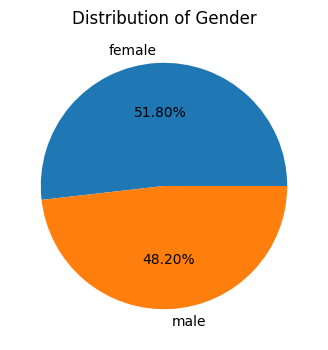

In [53]:
pie_chart('gender')

In [ ]:
data.groupby(by='gender').size()

gender
female    518
male      482
dtype: int64